# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:

df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [40]:
df.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [41]:

# Check for missing values in the DataFrame
print(df.isnull().sum())


week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


Revenue has missing value of 1074

In [42]:

# Interpolate missing values and round to 2 decimal places
df['revenue'] = df['revenue'].interpolate().round(2)



In [43]:

# Calculate the mode of the 'revenue' column
revenue_mode = df['revenue'].mode()[0]

# Replace NaN values with the mode
df['revenue'].fillna(revenue_mode, inplace=True)


In [44]:
df.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

# Data Validation and Cleaning Steps

Product sale is a dataset that contains 8 variables these variables are;  week, sales_method, customer_id, nb_sold, revenue, nb_site_visits, state.<br>After the dataset was loaded using pandas library, the first step was to validate and clean each variable<br>
I checked for missing values in the week column, I also wrote a code to validate that the column could only house numeric values. <br>
Sale_method contained multiple variations of the same method ("Email" vs. "email", "Email + Call" vs. "em + call"), to address this, converted the column to all lowercase, create a dictionary with all the option as key and mapping the to the correct values, then finally group entries into consistent format<br>
customer_id Ensured each entry was unique and properly formatted as a UUID (universal unique identifier) string. No cleaning was required for this column.<br>
nb_sold  I validated that all values were numeric and greater than zero. No missing or invalid values were found.<br>
Revenue I checked for missing values or null values, missing values are Interpolated.<br>
nb_site_visits checked that all values were non-negative integers. The column was clean and did not require further validation.<br>
State cleaned any formatting inconsistencies and ensured all values matched valid US state names or abbreviations.<br>



Ensure that values are integers and fall within an expected range (e.g., 1 to 52 for weeks of a year).

Convert any non-integer values to integers.

In [45]:
df['week'] = pd.to_numeric(df['week'], errors='coerce')  # Convert to numeric and handle errors
df = df[(df['week'] >= 1) & (df['week'] <= 52)]  # Filter out invalid week values



# sales_method (categorical) <br>
Expected Data Type: Categorical (values like 'Email', 'Call', 'Email + Call')<br>
Validation:
Ensure that all values fall within the expected set of predefined categories.<br>
Cleaning:<br>
Convert values to lowercase or consistent formatting.<br>
Handle unexpected or null values by assigning a default category (e.g., 'Unknown') or filling them in based on other variables (imputation).

*   List item
*   List item



In [46]:
# Define the valid categories
valid_sales_methods = {
    'call': 'Call',
    'email': 'Email',
    'email + call': 'Email + Call',
    'em + call': 'Email + Call'  # Fixing typos or variants
}

# Convert to lowercase to make comparison easier
df['sales_method'] = df['sales_method'].str.lower()

# Replace the incorrect or variant entries with the correct categories
df['sales_method'] = df['sales_method'].map(valid_sales_methods)

# Drop rows where 'sales_method' could not be mapped correctly
df = df.dropna(subset=['sales_method'])

# Convert back to category type after cleaning
df['sales_method'] = df['sales_method'].astype('category')

# Check the unique categories after cleaning
print(df['sales_method'].unique())


['Email', 'Email + Call', 'Call']
Categories (3, object): ['Call', 'Email', 'Email + Call']


nb_sold <br> (integer 
Expected Data Type: Integer (Number of Units Sold)
Validation:<br> 
Ensure all values are non-negative integers (no negative values or decimals).<br> 
Cleaning:<br> 
Fill missing or null values with 0 (if it's logical based on context) or impute with an average.<br> 
Remove or correct rows with invalid negative values.

In [47]:
df['nb_sold'] = pd.to_numeric(df['nb_sold'], errors='coerce')  # Convert to numeric
df['nb_sold'] = df['nb_sold'].fillna(0)  # Fill missing values with 0
df = df[df['nb_sold'] >= 0]  # Filter out negative values

# revenue (float)
Expected Data Type: Float (Monetary value)<br> 
Validation:<br> 
Ensure all values are non-negative floats or integers. Handle missing or null values, which might indicate no revenue.
Cleaning:<br> 
Fill missing values with 0 (if missing revenue is valid, e.g., no sale) or use mean/median imputation.<br> 
Ensure no negative values exist.<br> 

In [48]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')  # Convert to numeric
df['revenue'] = df['revenue'].fillna(0)  # Fill missing revenue with 0
df = df[df['revenue'] >= 0]  # Filter out negative values


# years_as_customer (integer)

<br>
Expected Data Type: Integer
Validation:<br>
Ensure that values are non-negative integers.<br>
Check for outliers (e.g., customers with a very high number of years that don’t make sense).<br>
Cleaning:<br>
Fill missing values with 0 or an appropriate default.<br>
Remove or correct negative values and large outlie

In [49]:
df['years_as_customer'] = pd.to_numeric(df['years_as_customer'], errors='coerce')  # Convert to numeric
df['years_as_customer'] = df['years_as_customer'].fillna(0)  # Fill missing values with 0
df = df[df['years_as_customer'] >= 0]  # Filter out negative values

# nb_site_visits (integer)
Expected Data Type: Integer (Number of Site Visits)<br>
Validation:<br>
Ensure values are non-negative integers (no decimals or negative values).<br>
Check for outliers (e.g., excessively high or low number of site visits).<br>
Cleaning:<br>
Fill missing values with 0 or impute based on other related variables.<br>
Remove or correct negative values and outliers.

In [50]:
df['nb_site_visits'] = pd.to_numeric(df['nb_site_visits'], errors='coerce')  # Convert to numeric
df['nb_site_visits'] = df['nb_site_visits'].fillna(0)  # Fill missing values with 0
df = df[df['nb_site_visits'] >= 0]  # Filter out negative values


# state (categorical)
Expected Data Type: Categorical (State names, e.g., 'Arizona', 'Kansas')
Validation:<br>
Ensure all values are valid U.S. state names.<br>
Handle inconsistent naming (e.g., abbreviations vs. full names).<br>
Cleaning:<br>
Standardize state names to either abbreviations or full names.<br>
Remove or correct invalid or missing state entries.

In [51]:
df['state'] = df['state'].astype('category')  # Convert to categorical


In [62]:
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,51.86,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,71.52,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


# Univariate Analysis:

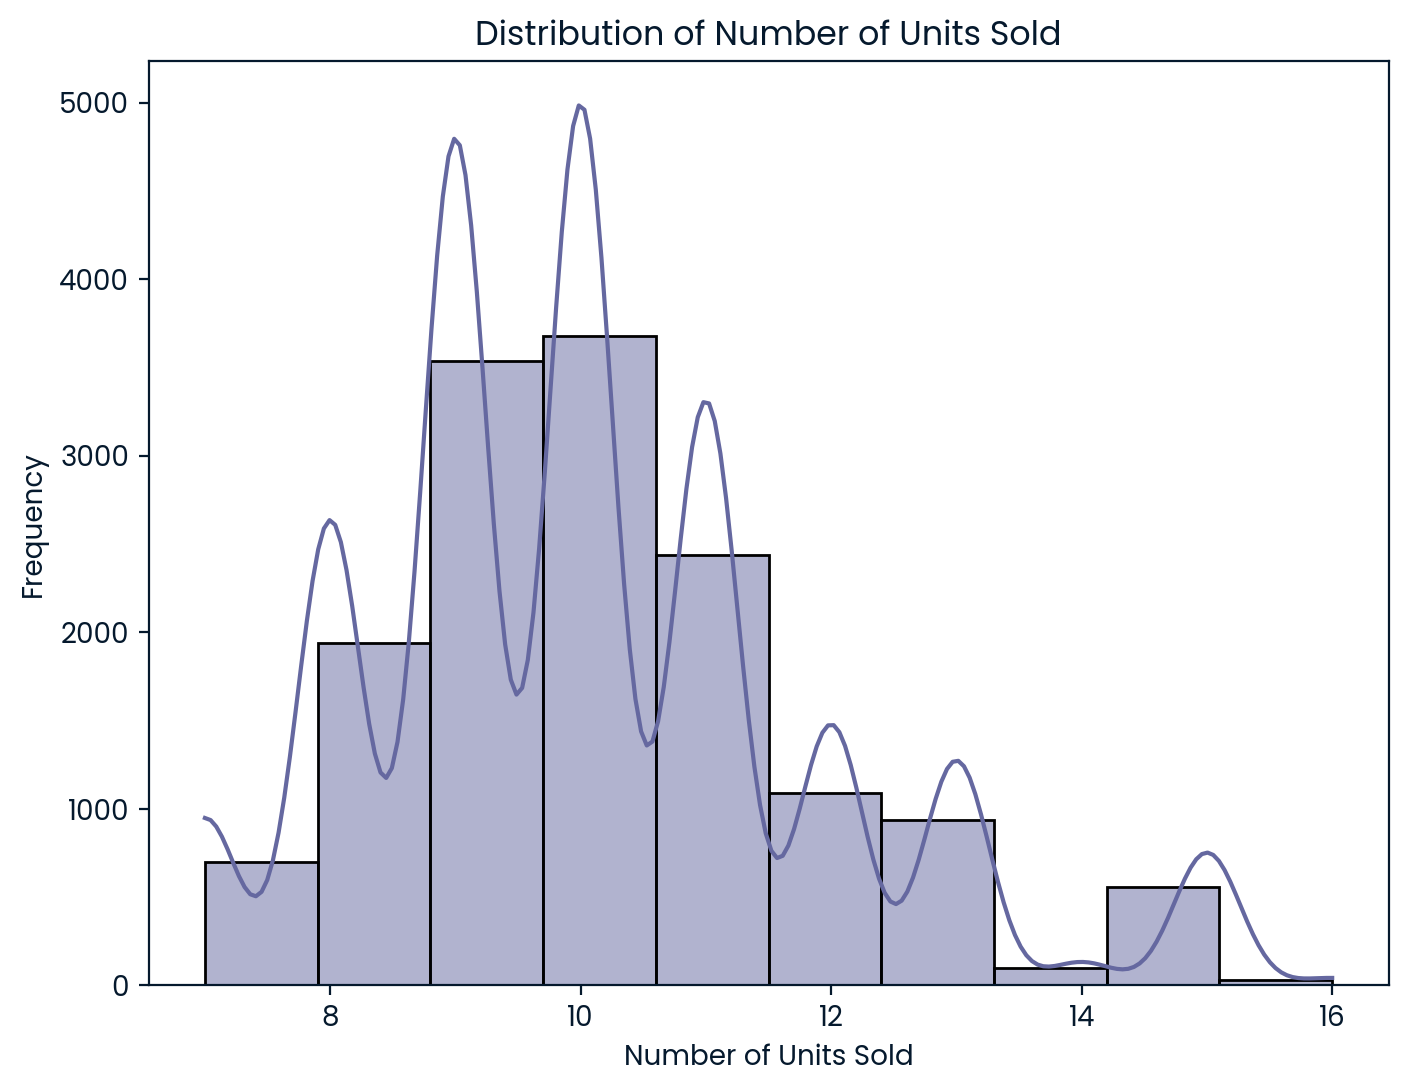

In [52]:

# Histogram for number of units sold
plt.figure(figsize=(8, 6))
sns.histplot(df['nb_sold'], bins=10, kde=True)
plt.title('Distribution of Number of Units Sold')
plt.xlabel('Number of Units Sold')
plt.ylabel('Frequency')
plt.show()


The shape of the histogram reveals that the distribution is right-skewed. This means that most sales transactions involve a lower number of units sold (around 8 to 12 units), Most sales involve around 9 to 11 units. This is where the bulk of the transactions lie, with a few transactions involving more than 13 units.

In [53]:
import plotly.express as px

# Create interactive box plot for revenue
fig = px.box(df, x='revenue', title='Box Plot of Revenue')

# Update the layout for better presentation
fig.update_layout(
    xaxis_title='Revenue ($)',
    yaxis_title='',
    showlegend=False
)

# Show the interactive plot
fig.show()


The aim is to answer key business questions related to sales performance based on the dataset 
The box plot of revenue shows that most revenue values are concentrated in the lower range, <br>
The median value is 89.405 which means that 50% of the revenue is less than 89$, we also notice that their whiskers are spread, lastly, there is a significant number of outliers, which means they are significantly higher than the rest of the data.<br>
Most of the revenue transactions are concentrated between 50 and 150 



## Bivariate Analysis

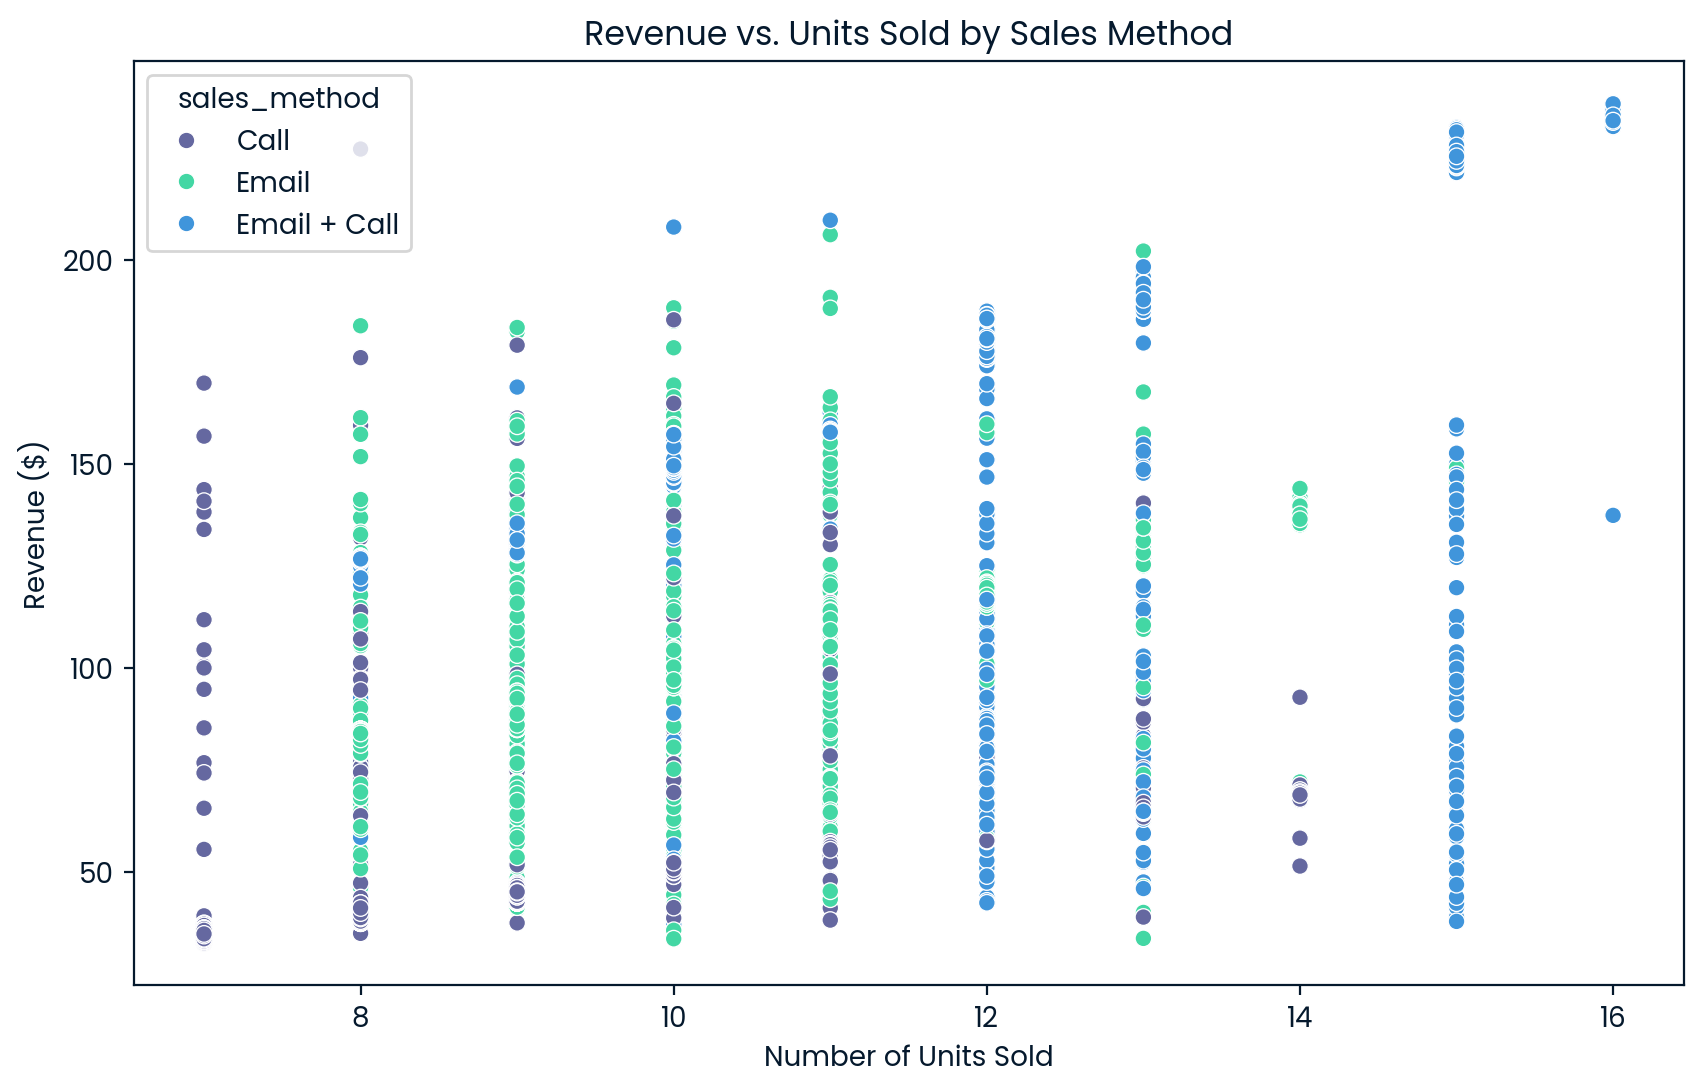

In [54]:
# Scatter plot for revenue vs. units sold, colored by sales method
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nb_sold', y='revenue', hue='sales_method', data=df)
plt.title('Revenue vs. Units Sold by Sales Method')
plt.xlabel('Number of Units Sold')
plt.ylabel('Revenue ($)')
plt.show()

The scatter plot below shows the relationship between units sold and revenue, sale_method is included as the hue, to add details, we notice that most unit sold lie between 9 to 11, and the prevailing color is orange which means that emails, brought in most sales, we also note the when unit increase the most reliable method of selling becomes email+call since towards the higher end green color is dorminant.

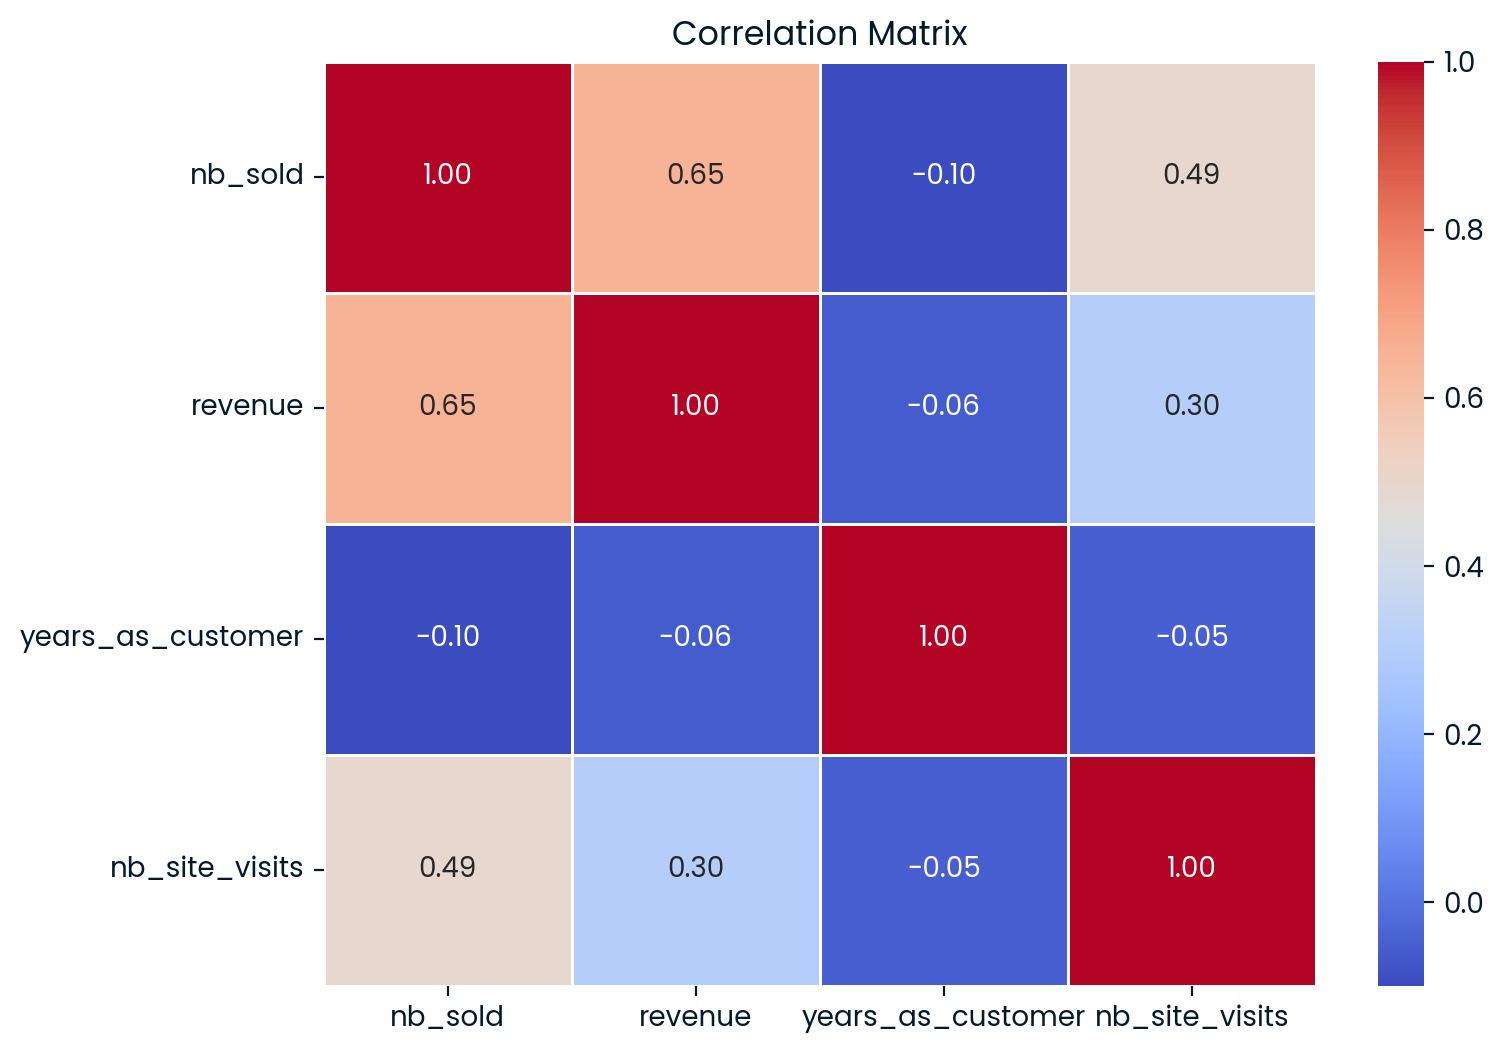

In [55]:

# Select only numerical columns for correlation matrix
numeric_columns = ['nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']

# Compute correlation matrix
corr_matrix = df[numeric_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### How many customers were there for each approach (sales method)?

In [56]:
import plotly.express as px

customer_count_per_method = df.groupby('sales_method')['customer_id'].nunique().reset_index()
customer_count_per_method.columns = ['Sales Method', 'Number of Customers']

# Create the pie chart
fig = px.pie(customer_count_per_method,
             values='Number of Customers',
             names='Sales Method',
             title='Number of Customers per Sales Method',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

The pie chart below shows the percentage of distribution num_customers,  nearly 50% of customers were reached out through  email, 33.1% of the total customers were called, and 17.1% we both emailed and called.

### What does the spread of the revenue look like overall? And for each method?

In [57]:
import plotly.express as px

fig = px.box(df, x='sales_method', y='revenue', color_discrete_sequence=px.colors.cyclical.IceFire,
             title='Revenue Spread for Each Sales Method')
fig.update_xaxes(title='Sales Method')
fig.update_yaxes(title='Revenue ($)')
fig.show()

In [58]:

fig = px.box(df, y='revenue', color_discrete_sequence=px.colors.sequential.Plasma,
             title='Overall Revenue Spread')

fig.update_yaxes(title='Revenue ($)')
fig.show()




### Based on the data, which method would you recommend we continue to use?


   sales_method  total_revenue  num_customers  avg_revenue_per_customer
0          Call      244287.55           4962                 49.231671
1         Email      723025.02           7466                 96.842355
2  Email + Call      441065.67           2572                171.487430


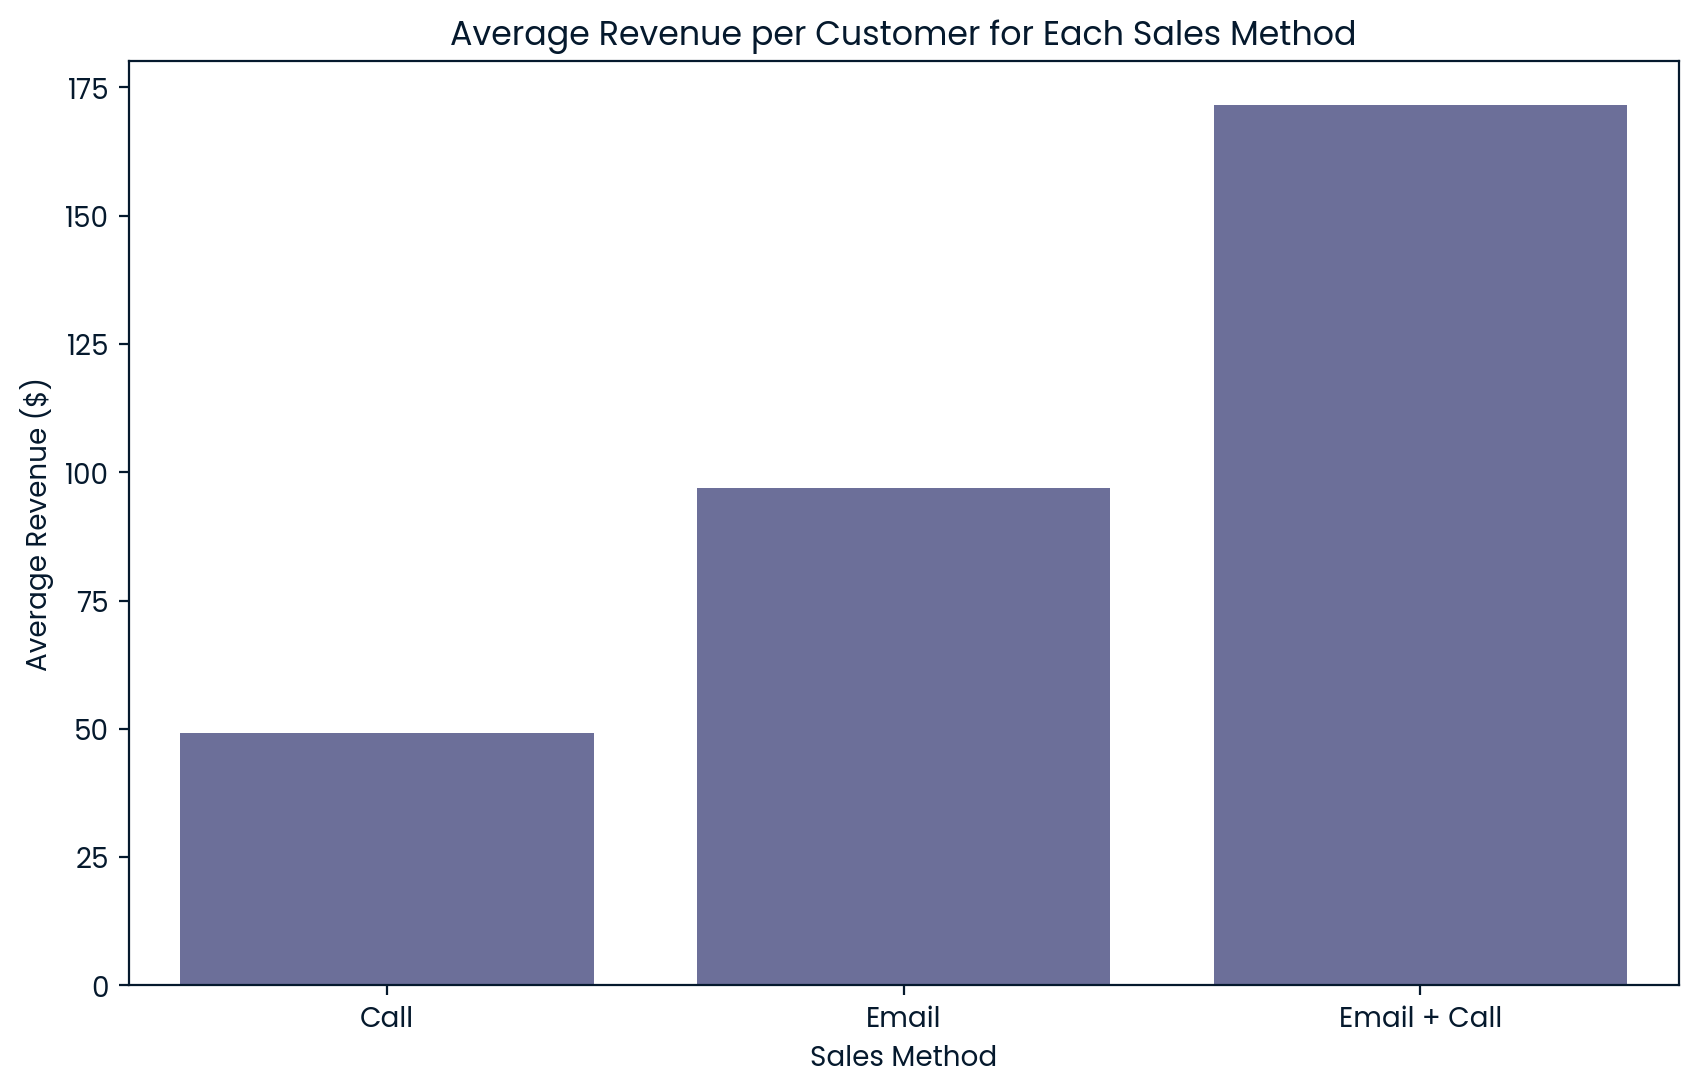

In [59]:
# Calculate total revenue and number of customers per method
method_efficiency = df.groupby('sales_method').agg(
    total_revenue=('revenue', 'sum'),
    num_customers=('customer_id', 'nunique')
).reset_index()

# Calculate the average revenue per customer
method_efficiency['avg_revenue_per_customer'] = method_efficiency['total_revenue'] / method_efficiency['num_customers']

print(method_efficiency)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='avg_revenue_per_customer', data=method_efficiency)
plt.title('Average Revenue per Customer for Each Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue ($)')
plt.show()


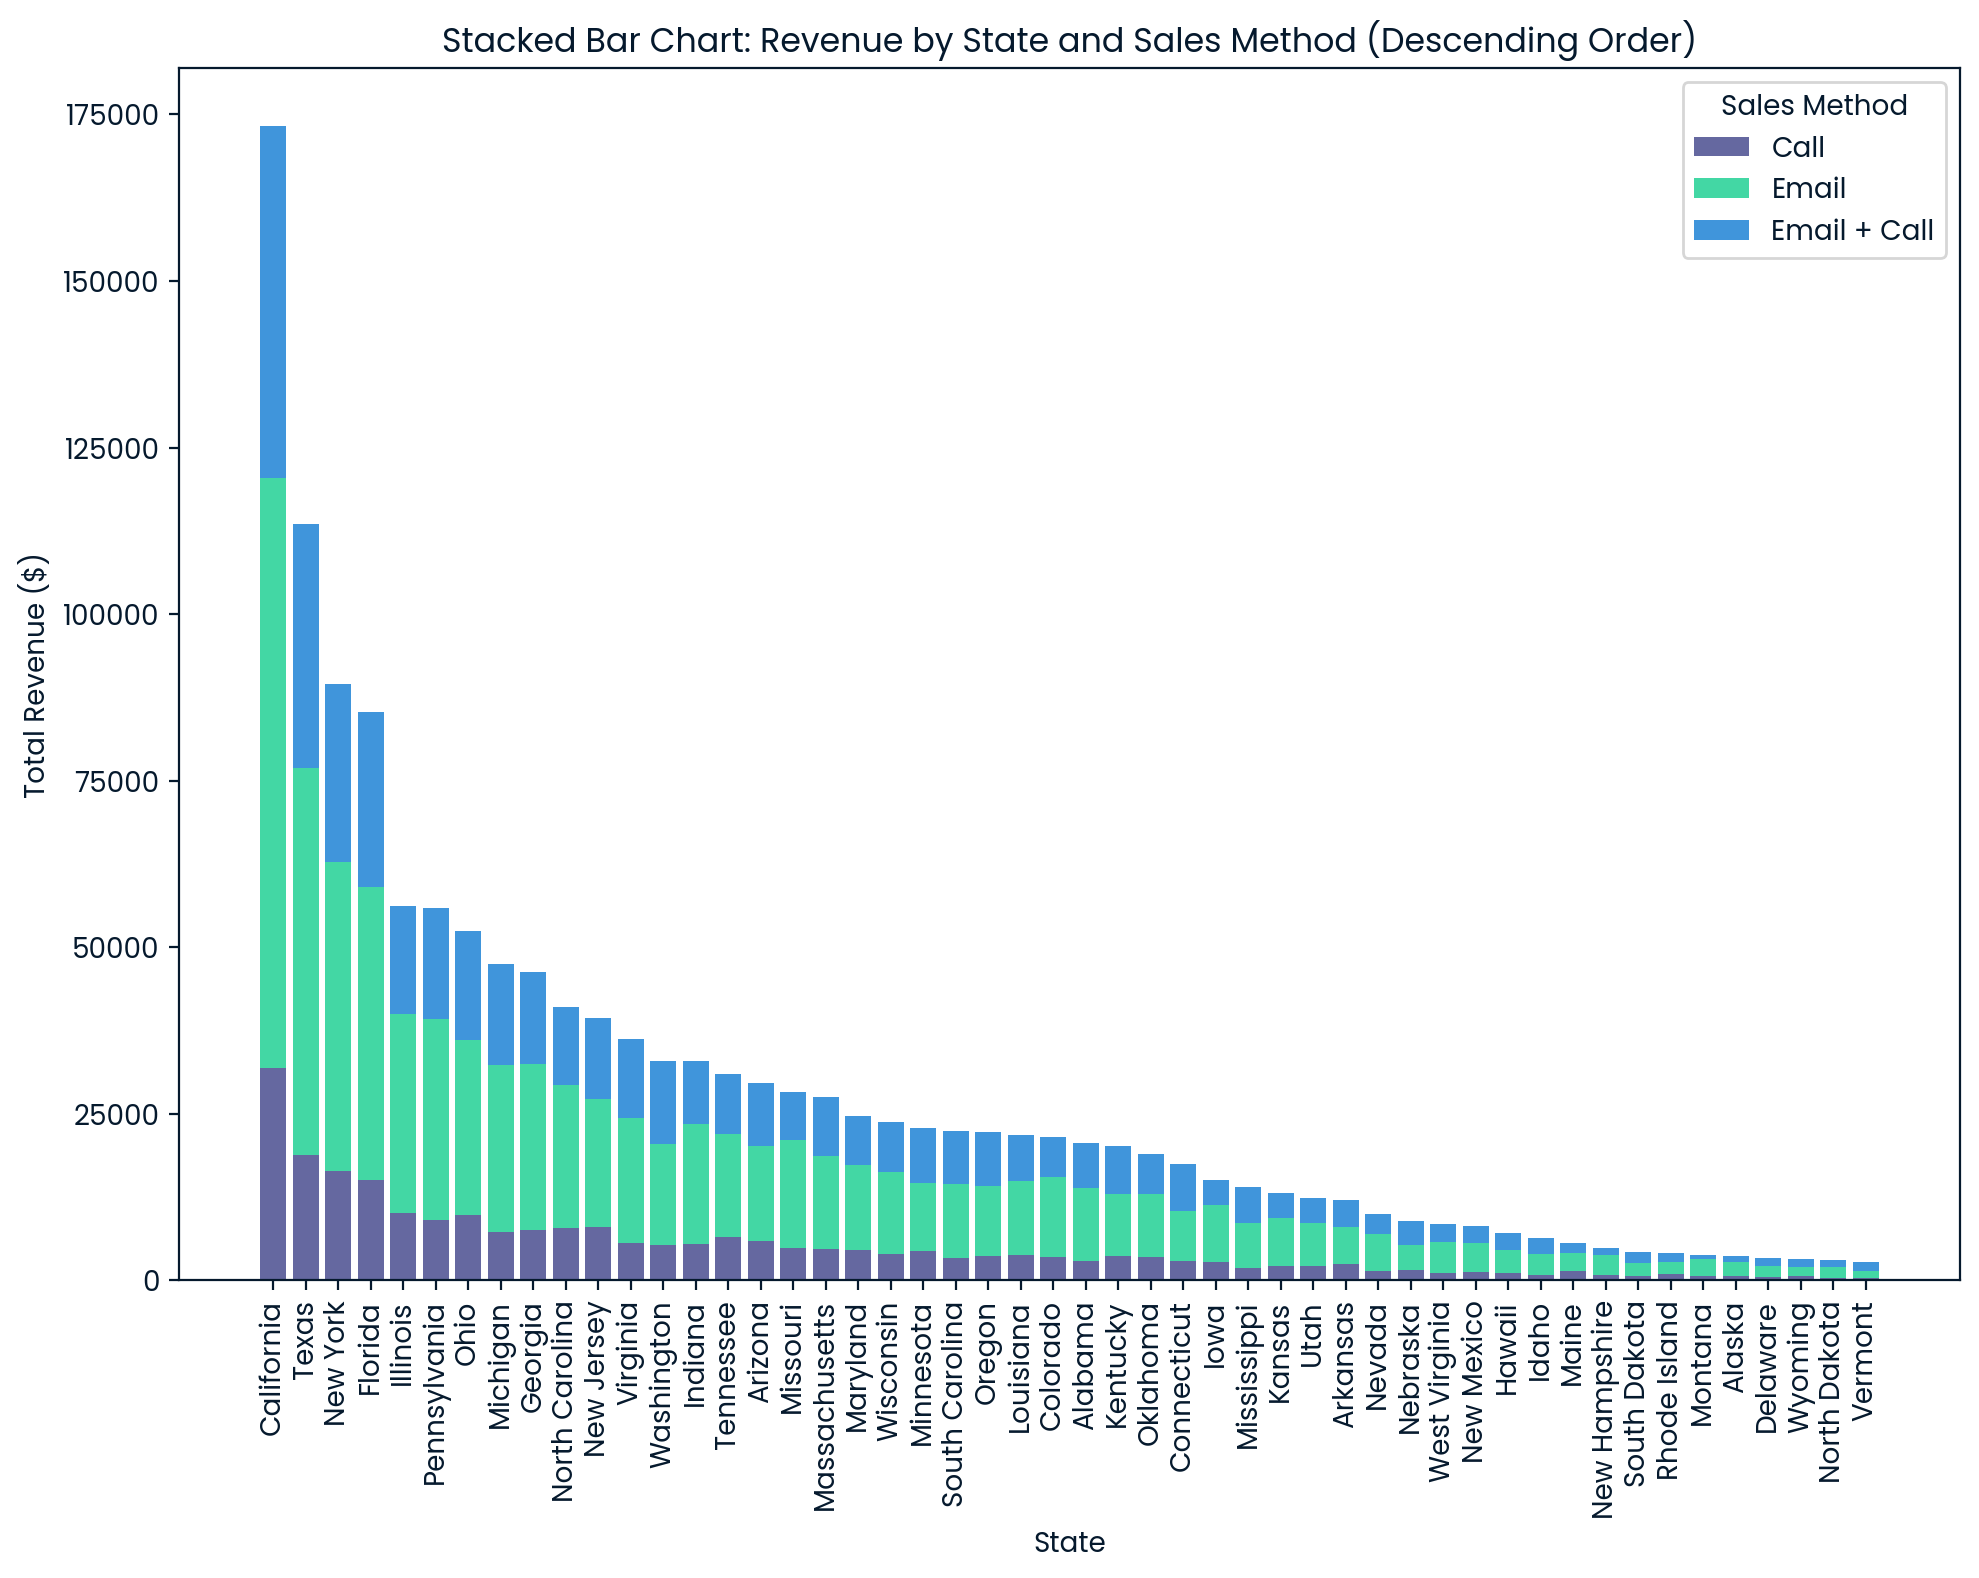

In [60]:
# Pivot the data to have sales_method as columns for easier stacking
pivot_data =df.pivot_table(values='revenue', index='state', columns='sales_method', aggfunc='sum').fillna(0)

# Compute the total revenue per state for sorting
pivot_data['total_revenue'] = pivot_data.sum(axis=1)

# Sort the states by total revenue in descending order
pivot_data = pivot_data.sort_values(by='total_revenue', ascending=False)

# Drop the total_revenue column since we no longer need it for plotting
pivot_data = pivot_data.drop(columns='total_revenue')

# Create the stacked bar chart
plt.figure(figsize=(10, 8))

# Stacking each sales method
bottom = None
for method in pivot_data.columns:
    plt.bar(pivot_data.index, pivot_data[method], bottom=bottom, label=method)
    if bottom is None:
        bottom = pivot_data[method]
    else:
        bottom += pivot_data[method]

# Adding labels and title
plt.title('Stacked Bar Chart: Revenue by State and Sales Method (Descending Order)')
plt.xlabel('State')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=90)
plt.legend(title='Sales Method')

# Show plot
plt.tight_layout()
plt.show()

### revenue over time for each method:

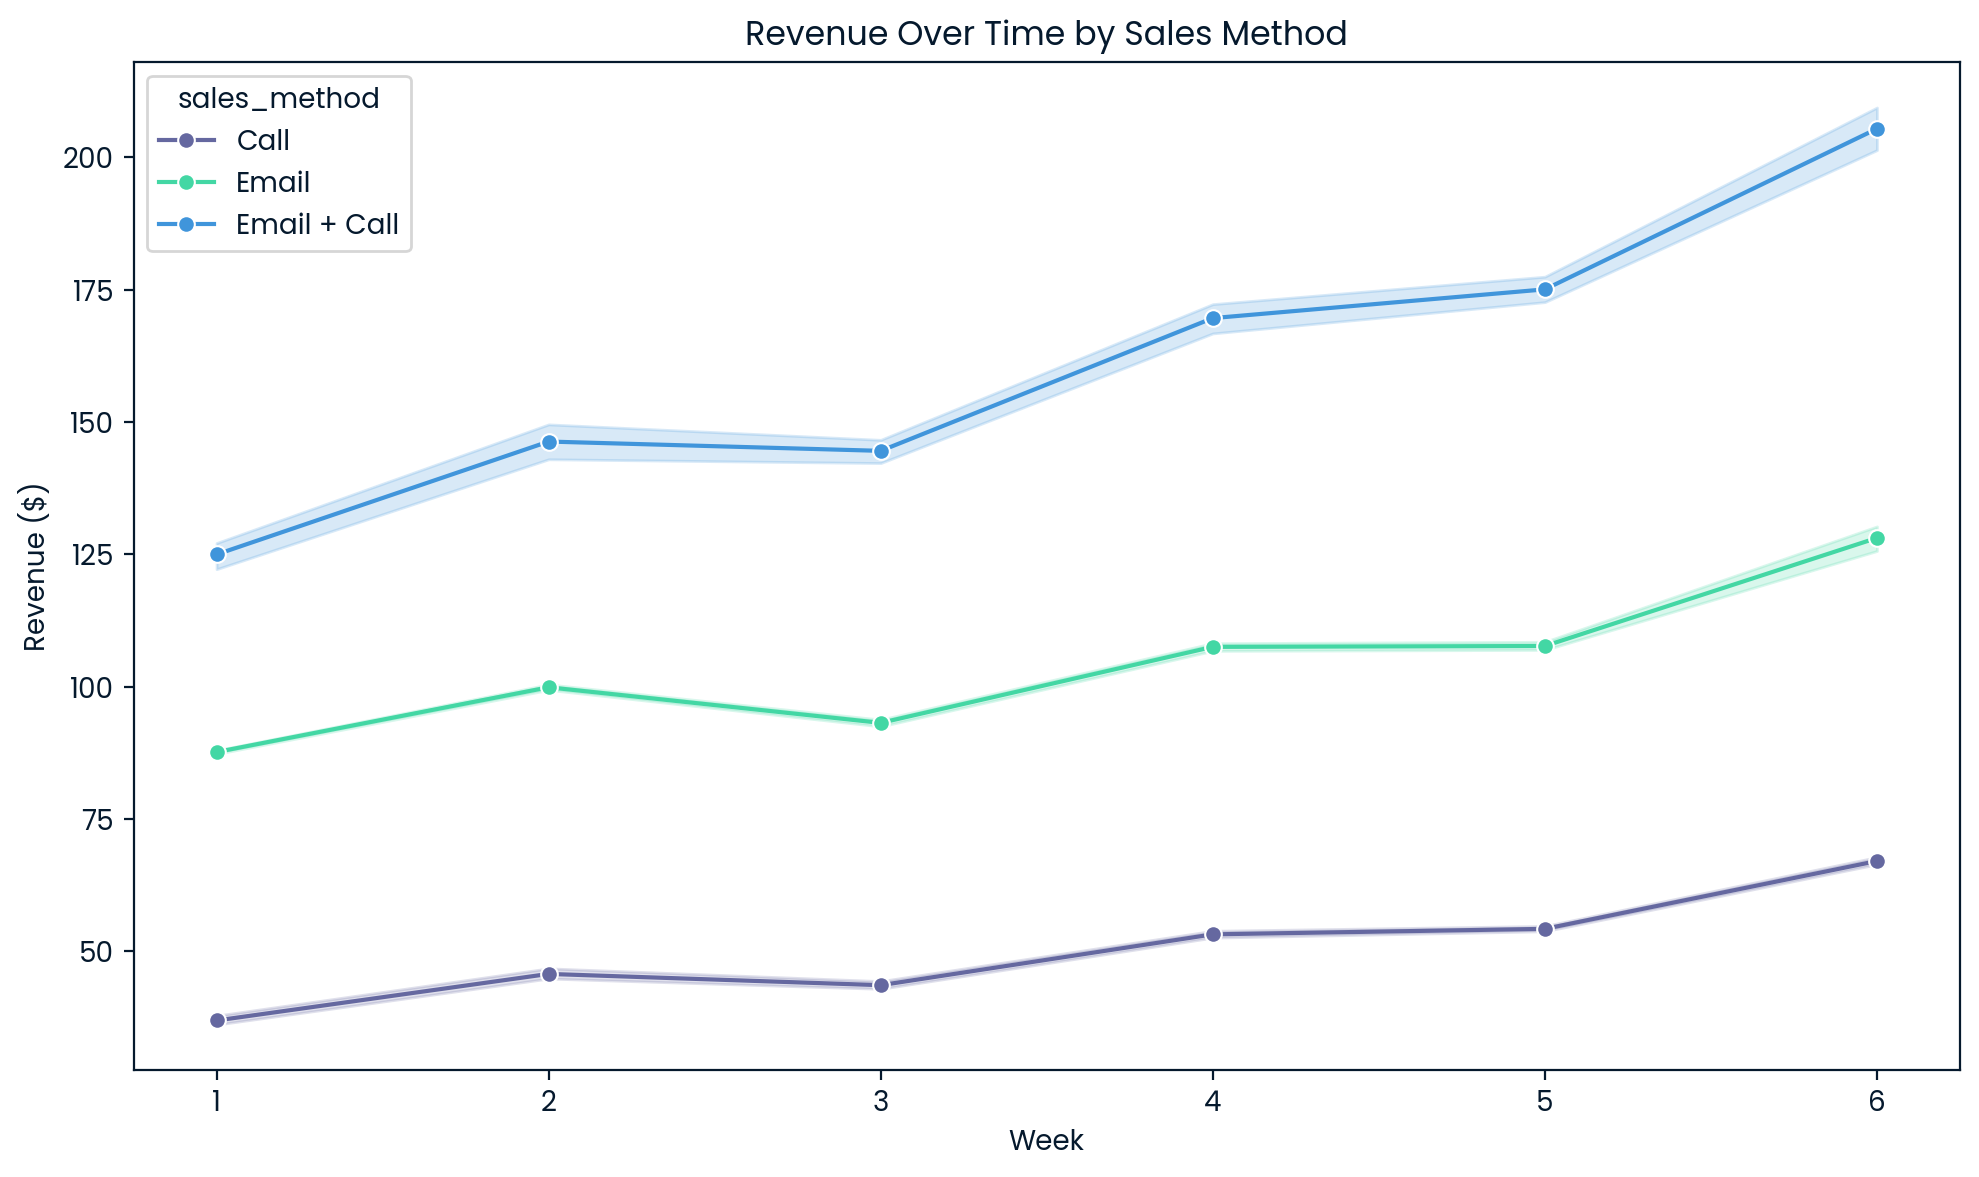

In [61]:

# Line plot to show how revenue changed over time for each sales method
plt.figure(figsize=(10, 6))

# Plot the revenue over time for each sales method
sns.lineplot(data=df, x='week', y='revenue', hue='sales_method', marker='o')

# Add titles and labels
plt.title('Revenue Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue ($)')

# Show the plot
plt.tight_layout()
plt.show()


## Metric for the Business to Monitor
Average Revenue per Customer by Sales Method<br>
This metric balances the effectiveness of each sales method in driving revenue and the number of customers it engages. It helps the business evaluate the efficiency of its sales team’s efforts.
## Monitoring Strategy:
Weekly: The sales team should track how each sales method performs regularly to quickly identify changes in effectiveness or shifts in customer behavior.<bbr>
Segmentation: The business should monitor this metric separately for different geographical segments (e.g., California vs Texas) to ensure that each group is targeted with the most appropriate sales method.


# Final Summary and Recommendations
## Summary of Findings:
The Email + Call method is the most effective for generating high revenue, but it requires more time and resources.<br>
The Email method is widely used and generates consistent revenue with lower effort but lower individual returns.<br>
Revenue for the Call method falls somewhere in between but shows similar consistency to Email.<br>
## Recommendations:
Target High-Value or long-term Customers with Email + Call, since they have the potential to generate larger transactions.<br>
Email methods should be used for low-value clients to maintain consistent engagement and revenue generation without using too many resources.<br><br>
Implement a regular tracking system for the average revenue per customer across all methods to quickly identify shifts in performance and adjust strategies accordingly.<br>
Re-evaluate the time and effort spent on the Email + Call method if its returns do not justify the resources required. If the Email method generates similar results over time, it may be more resource-efficient to focus on lower-cost methods.<br>
In conclusion, by following these measures the business can optimize its sales efforts and allocate resources effectively to maximize revenue while maintaining efficiency
